# Beispiel: XOR mit Perzeptron
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=b1fa7751-65c4-4db6-98d4-16666c8acf5a)

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Gebe Daten ein, um XOR-Funktion zu definieren.
\begin{aligned}
  (0,0) &\mapsto 0\\
  (0,1) &\mapsto 1\\
  (1,0) &\mapsto 1\\
  (1,1) &\mapsto 0
\end{aligned}

In [32]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

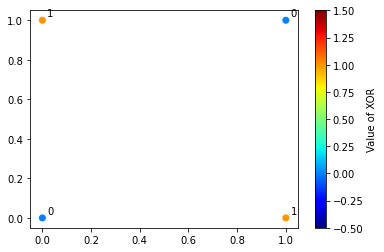

In [33]:
plt.scatter(x[:,0],x[:,1], c=y[:,0], cmap=plt.cm.get_cmap('jet'))
plt.colorbar(label='Value of XOR')
plt.clim(-0.5,1.5)
for i,v in enumerate(y[:,0]):
    plt.annotate(v, (x[i,0]+.02, x[i,1]+.02))

### Definiere Modell

In [34]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2,activation = "relu", name="Hidden")) #Layer 1
model.add(keras.layers.Dense(1, activation = "linear", name="Output", use_bias=True)) #Output Layer

model.compile(optimizer='sgd',loss='mean_squared_error')
model.summary()
keras.utils.plot_model(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden (Dense)              (None, 2)                 6         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Trainiere Modell

In [38]:
history = model.fit(x, y, epochs=500, batch_size=1);

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1984
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1975
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1958
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1950
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1943
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1934
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1928
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1921
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1914
Epoch 11/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1908
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1901
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

### Betrachte Ergebnis

In [39]:
y_learned = model.predict(x)[:,0]
y_learned

array([0.33388487, 0.33388487, 0.999926  , 0.33388487], dtype=float32)

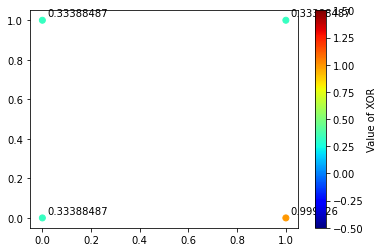

In [40]:
plt.scatter(x[:,0],x[:,1], c=y_learned, cmap=plt.cm.get_cmap('jet'))
plt.colorbar(label='Value of XOR')
plt.clim(-0.5,1.5)

for i,v in enumerate(y_learned):
    plt.annotate(v, (x[i,0]+.02, x[i,1]+.02))

### Wie kommt das zustande?
Untersuche die gelernten Gewichte:

In [44]:
hidden = model.layers[0]
hidden.name

'Hidden'

In [45]:
output = model.layers[1]
output.name

'Output'

In [46]:
w_hidden, b_hidden = hidden.get_weights()
w_out, b_out = output.get_weights()

In [47]:
w_hidden, b_hidden

(array([[ 0.7734647 ,  0.60585   ],
        [-0.37548357, -0.6374116 ]], dtype=float32),
 array([-0.39873174, -0.05262507], dtype=float32))

In [48]:
w_out, b_out

(array([[0.20596707],
        [1.0644106 ]], dtype=float32),
 array([0.33388487], dtype=float32))

### "Perfekte" Werte
Eine perfekte Lösung würde erreicht mit folgenden Werten:  
w_hidden = [[1,1], [1,1]]  
b_hidden = [0, -1]  
w_out = [1, -2]  
b_out = 0

Wenn wir diese verwenden, funktioniert es:

Hidden Layer:

In [49]:
# Erzeuge Array mit den korrekten Gewichten:
l=[]
w=np.array([[1,1],[1,1]]) #weights
b=np.array([0,-1]) #array of biases
l.append(w)
l.append(b)

# Setze die Gewichte des Hidden Layers entsprechend
hidden.set_weights(l)

Output Layer:

In [50]:
# Erzeuge Array mit den korrekten Gewichten:
l=[]
w=np.array([[1],[-2]]) #weights
b=np.array([0]) #array of biases
l.append(w)
l.append(b)

# Setze die Gewichte des Output Layers entsprechend
output.set_weights(l)

Liefert folgenden Ergebnis:

In [51]:
y_learned = model.predict(x)[:,0]
y_learned

array([0., 1., 1., 0.], dtype=float32)

## Kann das nicht auch trainiert werden?

In [64]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2,activation = "relu", name="Hidden", kernel_initializer="he_uniform")) #Layer 1
model.add(keras.layers.Dense(1, activation = "linear", name="Output", use_bias=True)) #Output Layer

model.compile(optimizer='sgd',loss='mean_squared_error')

# Anfängliche Gewichte:
hidden = model.layers[0]
output = model.layers[1]
w_hidden_start, b_hidden_start = hidden.get_weights()
w_out_start, b_out_start = output.get_weights()

### Durchrechnen des Modells mit den Startwerten der Gewichte
Hypothese: Wir benötigen einen *brauchbaren* Startwert für die Gewichte, sonst läuft der Optimierer in ein lokales Minimum und bleibt dort stecken.

In [18]:
print("Hidden Layer:\n w= ", w_hidden_start, "\n b=", b_hidden_start, "\n\n Output Layer:\n w=", w_out_start, "\n b=", b_out_start)

Hidden Layer:
 w=  [[ 0.9607357  -1.260099  ]
 [ 0.16269779 -0.72870326]] 
 b= [0. 0.] 

 Output Layer:
 w= [[-1.0808518]
 [ 1.145928 ]] 
 b= [0.]


#### Aus diesen Werten können wir ggf. auch manuell die Ergebnisse berechnen:


1.   Verwende Matrixprodukt `np.dot()`, um $x^T W + b$ zu berechnen.
> - Das ergibt einen Vektor, der die Werte der Neuronen im Hidden Layer vor Anwendung der Aktivierungsfunktion angibt.
2.   Wende Aktivierungsfunktion (`ReLU`) an, d.h. $\max(0, \cdot)$
> - Das ergibt einen Vektor, der das Endergebnis der Neuronen im Hidden Layer angibt.
3. Verwende wieder das Matrixprodukt, um die Linearkombination + Bias im Output Layer zu berechnen.
> - Das ist das Endergebnis.

In [19]:
a = np.dot([0,1],w_hidden_start) + b_hidden_start   # Hidden Layer vor Aktivierungsfunktion
a

array([ 0.16269779, -0.72870326])

In [20]:
b = np.maximum(a, 0)
b

array([0.16269779, 0.        ])

In [21]:
np.dot(b, w_out_start) + b_out_start   # Wende ReLU auf obiges Ergebnis an und verwende entsprechende Werte hier

array([-0.1758522])

#### Natürlich können wir dieses Ergebnis auch bekommen, wenn wir die aktuelle Version des Modells auf die `x`-Daten anwenden:

In [22]:
model.predict(x)

array([[ 0.       ],
       [-0.1758522],
       [-1.0384129],
       [-1.2142651]], dtype=float32)

## Trainieren

In [66]:
print("Vorhersage mit Ausgangsmodell:\n", model.predict(x), "\n\n Modell wird trainiert...\n")
history = model.fit(x, y, epochs=1000, batch_size=1, verbose=0);
print("Vorhersage mit trainiertem Modell:\n", model.predict(x))

Vorhersage mit Ausgangsmodell:
 [[3.2631159e-03]
 [9.9913031e-01]
 [9.9538553e-01]
 [5.9515238e-04]] 

 Modell wird trainiert...

Vorhersage mit trainiertem Modell:
 [[4.1127205e-06]
 [9.9999863e-01]
 [9.9999577e-01]
 [1.6689301e-06]]


## Was macht das Hidden Layer?

Wir extrahieren die Gewichte des Hidden Layer:

In [24]:
w_hidden, b_hidden = model.layers[0].get_weights()
w_out, b_out = model.layers[1].get_weights()

In [25]:
w_hidden, b_hidden

(array([[ 0.59547675, -1.260099  ],
        [ 0.59923255, -0.72870326]], dtype=float32),
 array([-0.6016236,  0.       ], dtype=float32))

Nun lassen wir alle vier Datenpunkte durch das Hidden Layer laufen:

Zuerst nur durch die affine Transformation...

In [26]:
interim_result_hidden = np.dot(x,w_hidden) + b_hidden
interim_result_hidden

array([[-0.60162359,  0.        ],
       [-0.00239104, -0.72870326],
       [-0.00614685, -1.26009905],
       [ 0.59308571, -1.98880231]])

... und dann noch durch die ReLU-Aktivierungsfunktion:

In [27]:
result_hidden = np.maximum(interim_result_hidden, 0)
result_hidden

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.59308571, 0.        ]])

Nun visualisieren wir, was das Hidden Layer insgesamt aus den vier Datenpunkten gemacht hat. Wir plotten dazu das aktuelle Bild dieser vier Punkte:

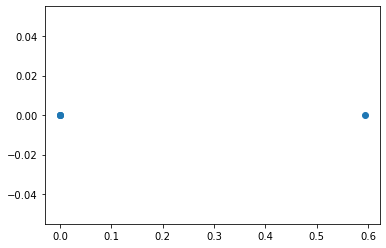

In [28]:
plt.scatter(result_hidden[:,0], result_hidden[:,1])

Diese vier Punkte (mit transformierten Koordinaten) können nun vom Output Layer linear getrennt werden.

In [29]:
np.dot(result_hidden,w_out) + b_out

array([[0.66779977],
       [0.66779977],
       [0.66779977],
       [0.00316758]])

In [30]:
b_out

array([0.6677998], dtype=float32)